# Esoph

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('esoph.csv', engine='c')
df = data.copy()
df.shape

(88, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   agegp      88 non-null     object
 1   alcgp      88 non-null     object
 2   tobgp      88 non-null     object
 3   ncases     88 non-null     int64 
 4   ncontrols  88 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.6+ KB


In [4]:
df

,agegp,alcgp,tobgp,ncases,ncontrols
0,25-34,0-39g/day,0-9g/day,0,40
1,25-34,0-39g/day,10-19,0,10
2,25-34,0-39g/day,20-29,0,6
3,25-34,0-39g/day,30+,0,5
4,25-34,40-79,0-9g/day,0,27
...,...,...,...,...,...
83,75+,40-79,30+,1,1
84,75+,80-119,0-9g/day,1,1
85,75+,80-119,10-19,1,1
86,75+,120+,0-9g/day,2,2


In [5]:
df.loc[df['alcgp'].str.contains('g/day') == False, 'alcgp'] = df['alcgp'].astype(str) + 'g/day'
df['alcgp']

In [6]:
df.loc[df['tobgp'].str.contains('g/day') == False, 'tobgp'] = df['tobgp'].astype(str) + 'g/day'
df['tobgp']

In [7]:
df

,agegp,alcgp,tobgp,ncases,ncontrols
0,25-34,0-39g/day,0-9g/day,0,40
1,25-34,0-39g/day,10-19g/day,0,10
2,25-34,0-39g/day,20-29g/day,0,6
3,25-34,0-39g/day,30+g/day,0,5
4,25-34,40-79g/day,0-9g/day,0,27
...,...,...,...,...,...
83,75+,40-79g/day,30+g/day,1,1
84,75+,80-119g/day,0-9g/day,1,1
85,75+,80-119g/day,10-19g/day,1,1
86,75+,120+g/day,0-9g/day,2,2


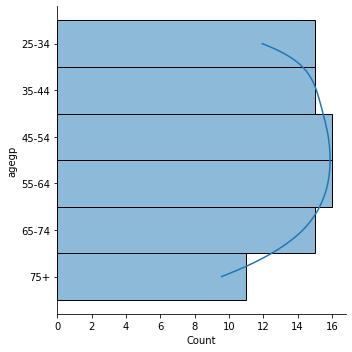

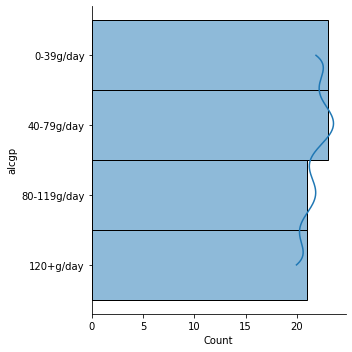

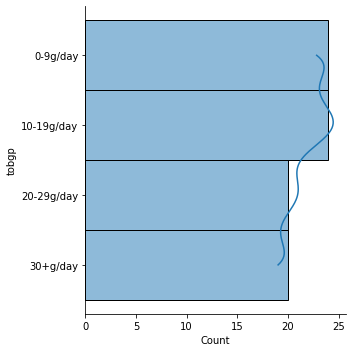

In [8]:
sns.displot(data=df, y='agegp', kde=True);
sns.displot(data=df, y='alcgp', kde=True);
sns.displot(data=df, y='tobgp', kde=True);

In [9]:
agrupado = df.groupby('agegp', as_index=False)['ncases', 'ncontrols'].sum()
agrupado

<ipython-input-9-06ed708cc714>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agrupado = df.groupby('agegp', as_index=False)['ncases', 'ncontrols'].sum()


,agegp,ncases,ncontrols
0,25-34,1,116
1,35-44,9,199
2,45-54,46,213
3,55-64,76,242
4,65-74,55,161
5,75+,13,44


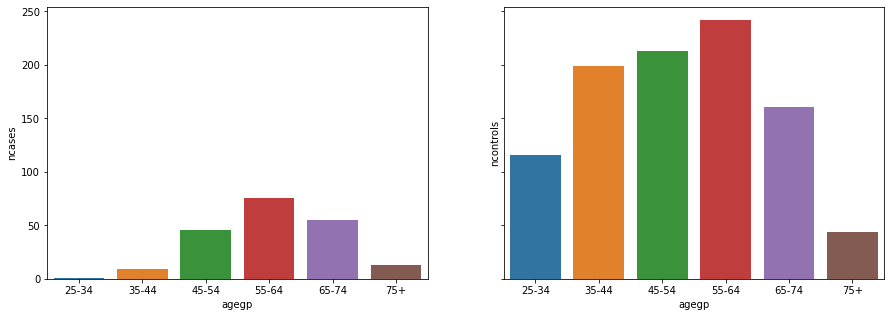

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0], data=agrupado, x='agegp', y='ncases');
sns.barplot(ax=axes[1], data=agrupado, x='agegp', y='ncontrols');

<ipython-input-11-afe667716ae4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agrupado1 = df.groupby('agegp', as_index=False)['alcgp', 'tobgp'].count()


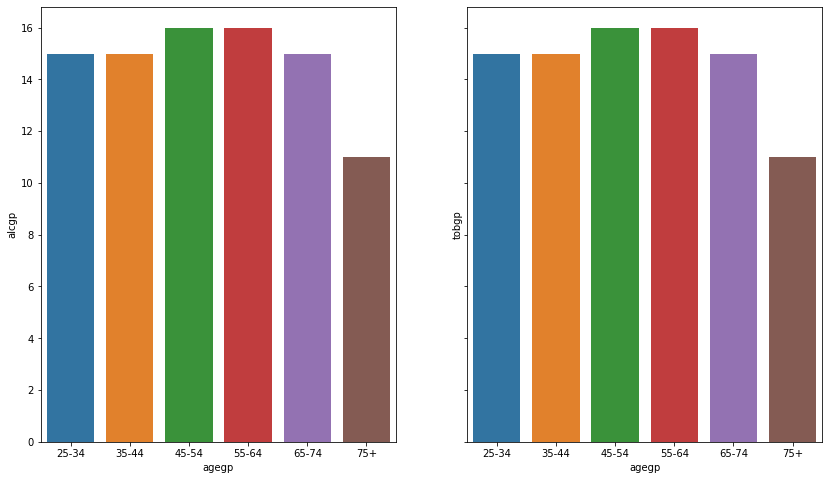

In [11]:
agrupado1 = df.groupby('agegp', as_index=False)['alcgp', 'tobgp'].count()
fig, ax = plt.subplots(1, 2, figsize=(14, 8), sharey=True)
sns.barplot(ax=ax[0], data=agrupado1, x='agegp', y='alcgp');
sns.barplot(ax=ax[1], data=agrupado1, x='agegp', y='tobgp');

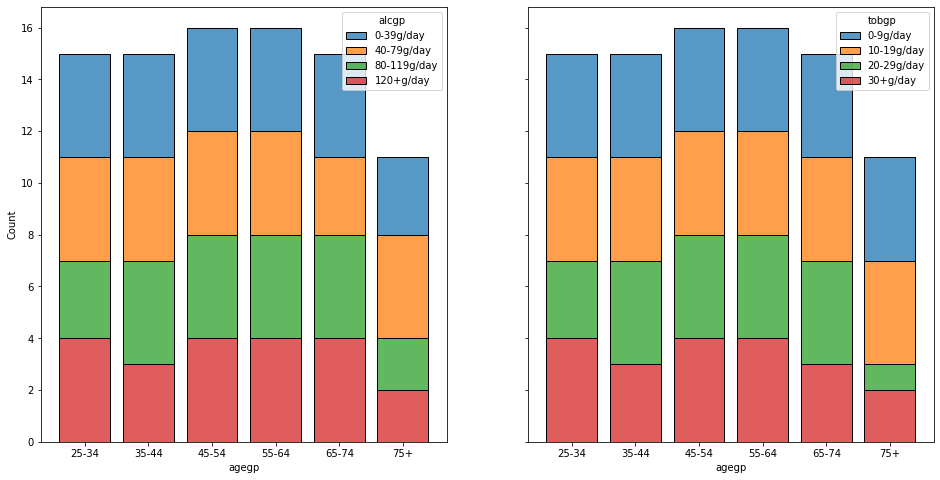

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
sns.histplot(ax=ax[0], data=df, x='agegp', hue='alcgp', multiple='stack', shrink=0.8);
sns.histplot(ax=ax[1], data=df, x='agegp', hue='tobgp', multiple='stack', shrink=0.8);

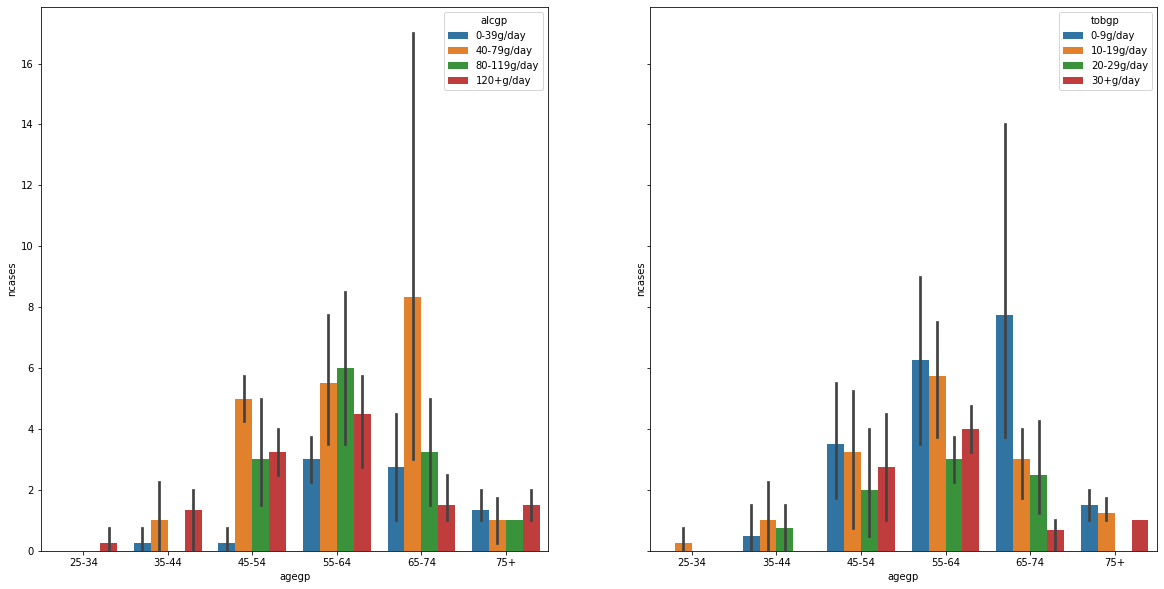

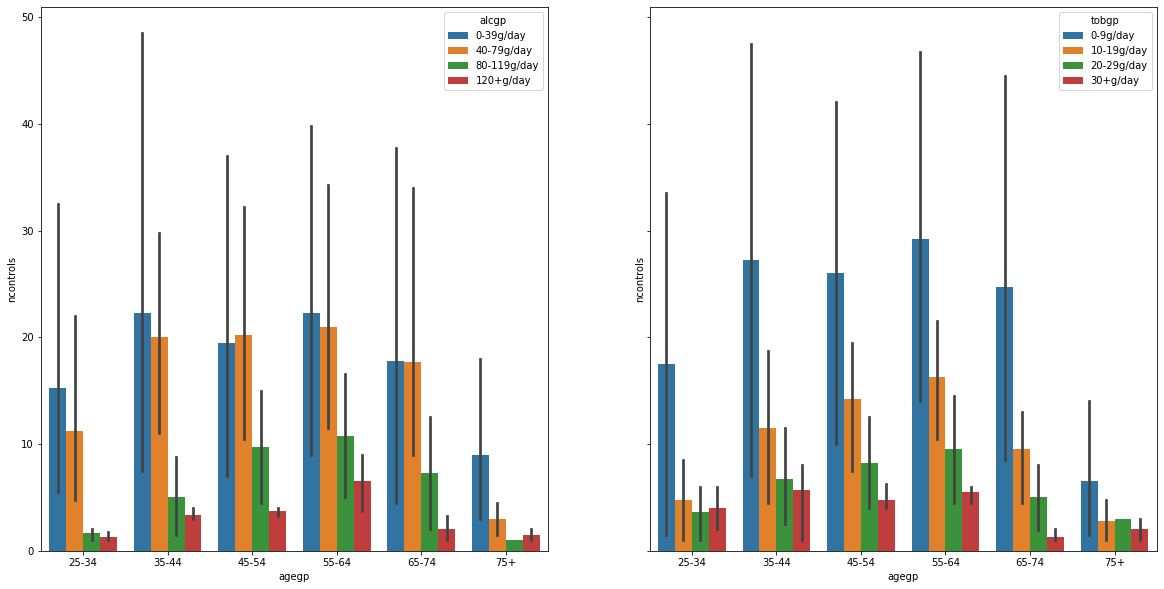

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=True, sharex=True)
sns.barplot(ax=ax[0], data=df, x='agegp', y='ncases', hue='alcgp');
sns.barplot(ax=ax[1], data=df, x='agegp', y='ncases', hue='tobgp');
fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=True, sharex=True)
sns.barplot(ax=ax[0], data=df, x='agegp', y='ncontrols', hue='alcgp');
sns.barplot(ax=ax[1], data=df, x='agegp', y='ncontrols', hue='tobgp');

In [14]:
df[df.describe(include=int).columns]

,ncases,ncontrols
0,0,40
1,0,10
2,0,6
3,0,5
4,0,27
...,...,...
83,1,1
84,1,1
85,1,1
86,2,2


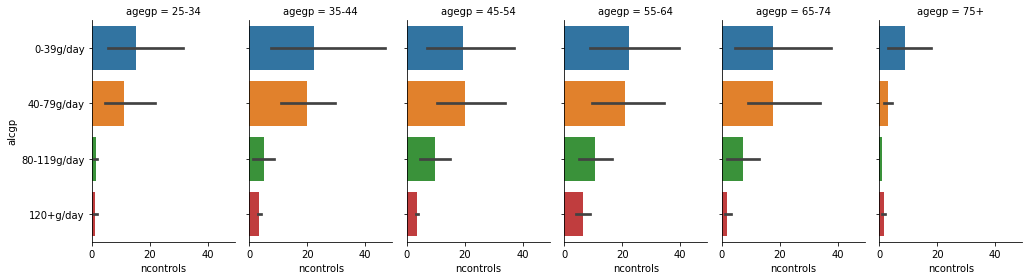

In [15]:
sns.catplot(data=df, y='alcgp', x='ncontrols', col='agegp', kind='bar', height=4, aspect=.6);
plt.tight_layout()

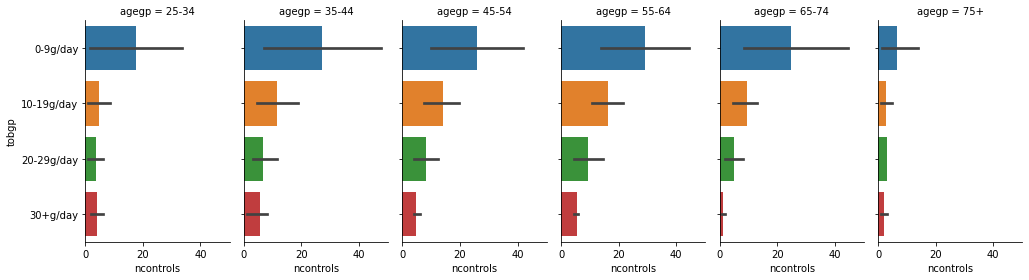

In [16]:
sns.catplot(data=df, y='tobgp', x='ncontrols', col='agegp', kind='bar', height=4, aspect=.6);

# Insect

In [17]:
data = pd.read_csv('insect.csv', engine='c')
df = data.copy()
df.shape

(72, 2)

In [18]:
df

,count,spray
0,10,A
1,7,A
2,20,A
3,14,A
4,14,A
...,...,...
67,10,F
68,26,F
69,26,F
70,24,F


In [19]:
agrupado = df.groupby('spray', as_index=False)['count'].sum()
agrupado

,spray,count
0,A,174
1,B,184
2,C,25
3,D,59
4,E,42
5,F,200


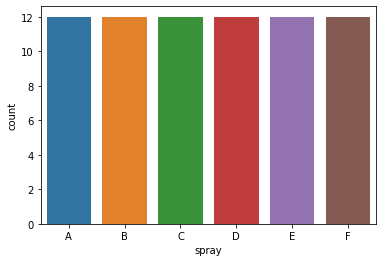

In [20]:
sns.countplot(data=df, x='spray');

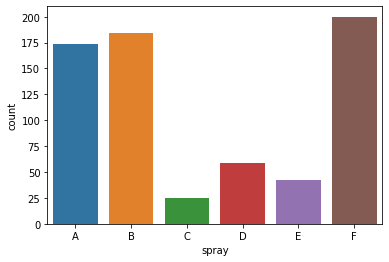

In [21]:
sns.barplot(data=agrupado, x='spray', y='count');

# Orchard

In [22]:
data = pd.read_csv('orchard.csv', engine='c')
df = data.copy()
df.shape

(64, 4)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   decrease   64 non-null     int64 
 1   rowpos     64 non-null     int64 
 2   colpos     64 non-null     int64 
 3   treatment  64 non-null     object
dtypes: int64(3), object(1)
memory usage: 2.1+ KB


In [24]:
df

,decrease,rowpos,colpos,treatment
0,57,1,1,D
1,95,2,1,E
2,8,3,1,B
3,69,4,1,H
4,92,5,1,G
...,...,...,...,...
59,14,4,8,B
60,86,5,8,H
61,55,6,8,E
62,3,7,8,A


In [25]:
df['treatment']

In [26]:
agrupado = df.groupby('treatment', as_index=False)['decrease'].count()
agrupado

,treatment,decrease
0,A,8
1,B,8
2,C,8
3,D,8
4,E,8
5,F,8
6,G,8
7,H,8


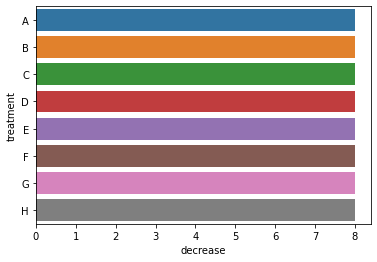

In [27]:
sns.barplot(data=agrupado, x='decrease', y='treatment');

In [28]:
agrupado = df.groupby('treatment', as_index=False)['decrease'].sum()
agrupado

,treatment,decrease
0,A,37
1,B,61
2,C,202
3,D,280
4,E,505
5,F,552
6,G,548
7,H,722


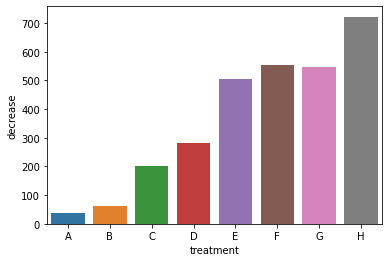

In [29]:
sns.barplot(data=agrupado, x='treatment', y='decrease');

As orquídeas dos tipos "E", "F", "G" e "H" são as que possuem o maior decaimento. Por favor, dê mais atenção a estas orquídeas. Enquanto isso, o restante das outras orquídeas possuem uma quantidade menor. 

Lembrando que a quantidade das amostras de cada orquídea são iguais.

# Trees

In [30]:
data = pd.read_csv('trees.csv', engine='c')
df = data.copy()
df.shape

(31, 3)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Girth   31 non-null     float64
 1   Height  31 non-null     int64  
 2   Volume  31 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 872.0 bytes


In [32]:
df

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


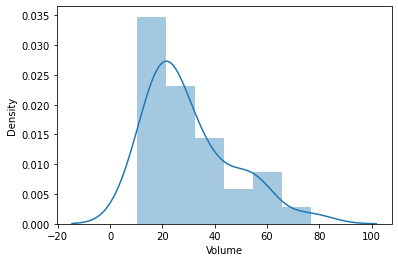

In [33]:
sns.distplot(df.Volume, kde=True);

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


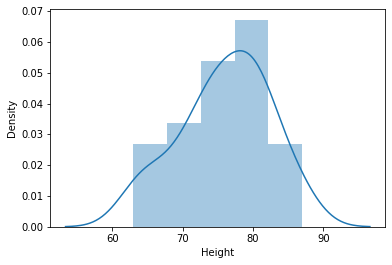

In [34]:
sns.distplot(df.Height, kde=True);

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


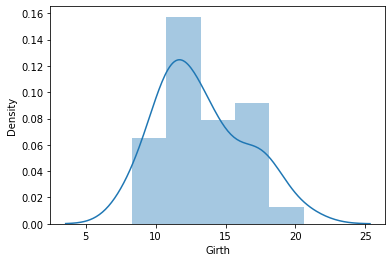

In [35]:
sns.distplot(df.Girth, kde=True);

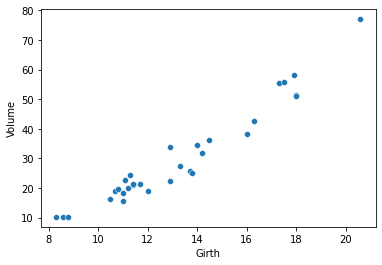

In [36]:
sns.scatterplot(data=df, x='Girth', y='Volume');

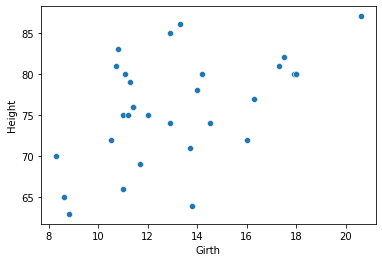

In [37]:
sns.scatterplot(data=df, x='Girth', y='Height');

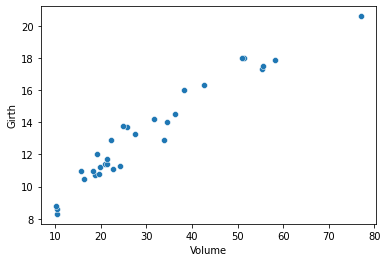

In [38]:
sns.scatterplot(data=df, x='Volume', y='Girth');

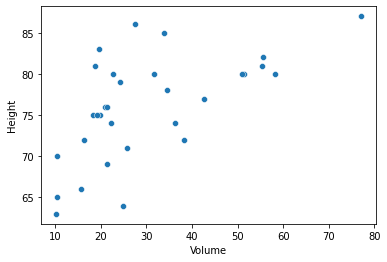

In [39]:
sns.scatterplot(data=df, x='Volume', y='Height');

As colunas "Volume" e "Girth" estão intimamente relacionadas entre si. Enquanto que a coluna "Height" possue pouca ou nenhuma correlação com as outras duas colunas.

# Tempo

In [40]:
import statistics as sts

In [41]:
data = pd.read_csv('tempo.csv', sep=';', engine='c')
df = data.copy()
df.shape

(14, 5)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      13 non-null     float64
 3   Vento        13 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 688.0+ bytes


In [43]:
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [44]:
df[df.describe(include=object).columns]

,Aparencia,Vento,Jogar
0,sol,FALSO,nao
1,sol,VERDADEIRO,nao
2,nublado,FALSO,sim
3,chuva,FALSO,sim
4,chuva,FALSO,sim
5,chuva,VERDADEIRO,nao
6,menos,VERDADEIRO,sim
7,sol,FALSO,nao
8,sol,FALSO,sim
9,chuva,NaN,sim


In [45]:
df['Vento'].fillna(sts.mode(df['Vento']), inplace=True)
df[df.describe(include=object).columns]

,Aparencia,Vento,Jogar
0,sol,FALSO,nao
1,sol,VERDADEIRO,nao
2,nublado,FALSO,sim
3,chuva,FALSO,sim
4,chuva,FALSO,sim
5,chuva,VERDADEIRO,nao
6,menos,VERDADEIRO,sim
7,sol,FALSO,nao
8,sol,FALSO,sim
9,chuva,FALSO,sim


In [46]:
df['Aparencia'].replace('menos', sts.mode(df['Aparencia']), inplace=True)
df['Aparencia']

In [47]:
df[df.describe(include=object).columns]

,Aparencia,Vento,Jogar
0,sol,FALSO,nao
1,sol,VERDADEIRO,nao
2,nublado,FALSO,sim
3,chuva,FALSO,sim
4,chuva,FALSO,sim
5,chuva,VERDADEIRO,nao
6,sol,VERDADEIRO,sim
7,sol,FALSO,nao
8,sol,FALSO,sim
9,chuva,FALSO,sim


In [48]:
df[df.describe(exclude=object).columns]

,Temperatura,Umidade
0,85,85.0
1,80,90.0
2,83,86.0
3,70,NaN
4,68,80.0
5,65,70.0
6,64,65.0
7,1220,95.0
8,69,70.0
9,75,200.0


In [49]:
df.loc[df['Temperatura'] > 212, 'Temperatura'] = sts.median(df.Temperatura)
df.Temperatura

In [50]:
df.fillna(sts.median(df.Umidade), inplace=True)
df.Umidade

In [51]:
df.loc[df.Umidade > 100, 'Umidade'] = sts.median(df.Umidade)
df.Umidade

In [52]:
import plotly.express as px

In [53]:
df[df.describe(include=object).columns]

,Aparencia,Vento,Jogar
0,sol,FALSO,nao
1,sol,VERDADEIRO,nao
2,nublado,FALSO,sim
3,chuva,FALSO,sim
4,chuva,FALSO,sim
5,chuva,VERDADEIRO,nao
6,sol,VERDADEIRO,sim
7,sol,FALSO,nao
8,sol,FALSO,sim
9,chuva,FALSO,sim


In [54]:
px.histogram(df, y='Aparencia', color='Jogar', barmode='group', facet_col='Vento')

In [55]:
print('Através deste gráfico, podemos perceber uma diminuição de pessoas que querem jogar quando há ocorrência de ventos. Enquanto que o inverso acontece quando não há ocorrência de ventos')
print('- As pessoas jogam em tempo nublado, tendo vento ou não.')
print('- As pessoas jogam quando há chuva sem vento, mas deixam de jogar quando há chuva com vento.')
print('- Quando está Sol e não tem vento há uma tendência das pessoas não jogarem futeblo, devido ao fato da alta temperatura.')
print('\tEnquanto que se há Sol e vento há uma tendência de pessoas jogarem futebol.')

Através deste gráfico, podemos perceber uma diminuição de pessoas que querem jogar quando há ocorrência de ventos. Enquanto que o inverso acontece quando não há ocorrência de ventos
- As pessoas jogam em tempo nublado, tendo vento ou não.
- As pessoas jogam quando há chuva sem vento, mas deixam de jogar quando há chuva com vento.
- Quando está Sol e não tem vento há uma tendência das pessoas não jogarem futeblo, devido ao fato da alta temperatura.
	Enquanto que se há Sol e vento há uma tendência de pessoas jogarem futebol.


In [56]:
df[df.describe(include=float).columns]

,Temperatura,Umidade
0,85.0,85.00
1,80.0,90.00
2,83.0,86.00
3,70.0,85.50
4,68.0,80.00
5,65.0,70.00
6,64.0,65.00
7,73.5,95.00
8,69.0,70.00
9,75.0,85.25


In [57]:
px.histogram(df, x='Temperatura', y='Aparencia', facet_col='Vento', color='Jogar', barmode='group')

In [58]:
px.histogram(df, x='Umidade', y='Aparencia', facet_col='Vento', color='Jogar', barmode='group')

In [59]:
px.histogram(df, x='Temperatura', y='Aparencia')

In [60]:
px.histogram(df, x='Umidade', y='Aparencia')